# Build a SLR model for the price of a used car (KMs v. Price)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the data set from csv file

In [49]:
df = pd.read_csv("student_car_data.csv", header=None)

Take a look at the data.

In [50]:
df

,0,1,2,3,4
0,2017,"14,822","�18,700.00",NaN,Toyota Auris HDi
1,2017,"31,286","�14,000.00",NaN,NaN
2,2017,"42,533","�7,300.00",2011.0,Seat Ibiza 1.2TSI
3,2017,"45,312","�6,700.00",2011.0,VW Polo
4,2017,"46,863","�10,700.00",2013.0,VW Polo 1.2 TSI
5,2017,"57,000","�6,100.00",NaN,NaN
6,2017,"60,000","�7,700.00",2013.0,Suzuki Swift
7,2017,"71,010","�5,800.00",2010.0,NaN
8,2017,"84,000","�8,000.00",2012.0,Mazda Demio
9,2017,"85,697","�3,000.00",2002.0,Toyota Vitz


Extract the fields we need and clean them up.

In [51]:
df = df.iloc[:,1:3]
#df.iloc[:,:].replace(regex=True, inplace=True, to_replace=",", value="")
df.iloc[:,:].replace(regex=True, inplace=True, to_replace="\D", value="")
df=df.apply(pd.to_numeric, errors="ignore")
df.columns = ["mileage", "price"]
df["price_thousands"] = df.price/1000
df["km_thousands"] = (df.mileage)/1000

In [52]:
print df

    mileage    price  price_thousands  km_thousands
0     14822  1870000           1870.0        14.822
1     31286  1400000           1400.0        31.286
2     42533   730000            730.0        42.533
3     45312   670000            670.0        45.312
4     46863  1070000           1070.0        46.863
5     57000   610000            610.0        57.000
6     60000   770000            770.0        60.000
7     71010   580000            580.0        71.010
8     84000   800000            800.0        84.000
9     85697   300000            300.0        85.697
10    97000   400000            400.0        97.000
11   118000   150000            150.0       118.000
12   118895   410000            410.0       118.895
13   142278   120000            120.0       142.278
14   178000   600000            600.0       178.000
15   199312    90000             90.0       199.312
16   138000   300000            300.0       138.000
17   110000   600000            600.0       110.000
18    45000 

### Generate best-fit line using SLR
First we define functions to fit a linear regression line to a data set...

In [53]:
def fitLine(data_x, data_y):
    sumX = np.sum(data_x)
    sumY = np.sum(data_y)
    sumXY = np.sum(np.multiply(data_x, data_y))
    sumX_2 = np.sum(np.multiply(data_x, data_x))
    
    n = len(data_x)
    
    m = (n*sumXY - sumX*sumY) / (n * sumX_2 - (sumX*sumX))
    
    b = (sumY * sumX_2 - sumXY*sumX) / (n*sumX_2 - (sumX*sumX))
    
    return (m,b)

... and one to plot a line given the slope and intercept

In [54]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals

    plt.plot(x_vals, y_vals, '--')

Now we plot our dataset and a fitted regression line...

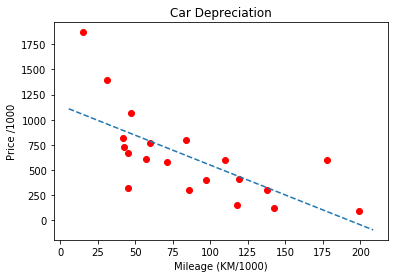

In [55]:
plt.figure()
plt.title("Car Depreciation")
plt.xlabel("Mileage (KM/1000)")
plt.ylabel("Price /1000")
#plt.axis([min_mileage, max_mileage, min_price, max_price])

mileage_prices = df[["km_thousands", "price_thousands"]]

(m,b) = fitLine(mileage_prices.iloc[:,0], mileage_prices.iloc[:,1])

plt.plot(df.km_thousands, df.price_thousands,"ro")

abline(m,b)

plt.show()
plt.close()

Calculate R^2 for our line of best fit...

In [56]:
def calcRsquared(dataset, y_hat):
    r2Num = sum(np.square(dataset[:,1]-y_hat))

    y_avg = np.mean(dataset[:,1])

    r2Den = sum(np.square(dataset[:,1]-y_avg))

    r2 = 1.-(r2Num/r2Den)

    return r2

In [57]:
# Calculate R Squared
dset = np.array(df[["km_thousands", "price_thousands"]])

y_hat = b+m*dset[:,0]

calcRsquared(dset, y_hat)


0.47055838046690779

This accuracy is not great...visual inspection of the above plot suggests that the data would conform better to a decaying curve asymptotically approaching zero. This is not surprising because the value of a car cannot go negative, no matter how high the mileage. This sounds like a log curve, so let's try fitting a log curve to the data...
We define a function to plot a log curve...

In [58]:
def plotlog(m,b):
    axes = plt.gca()
    x_vals = np.arange(axes.get_xlim()[0], axes.get_xlim()[1], (axes.get_xlim()[1]-axes.get_xlim()[0])/20)
    y_vals = b+m*(np.log(x_vals))
    
    plt.plot(x_vals, y_vals, "--")

We create a new data column taking the log of the mileage and fit a regression line using the log scale instead of the linear scale and plot the data on a log scale...

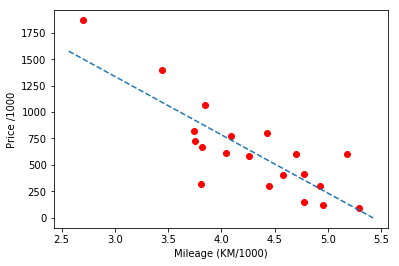

In [59]:
df["km_log"] = np.log(df["km_thousands"])

plt.figure()

plt.xlabel("Mileage (KM/1000)")
plt.ylabel("Price /1000")
#plt.axis([min_mileage, max_mileage, min_price, max_price])

mileage_prices = df[["km_log", "price_thousands"]]

(m,b) = fitLine(mileage_prices.iloc[:,0], mileage_prices.iloc[:,1])

plt.plot(df.km_log, df.price_thousands,"ro")

abline(m,b)

plt.show()
plt.close()

The data seems to fit much better on a log scale than a linear scale...let's plot the log line on a linear scale...

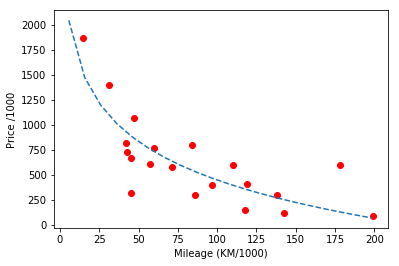

In [60]:
plt.figure()

plt.xlabel("Mileage (KM/1000)")
plt.ylabel("Price /1000")
#plt.axis([min_mileage, max_mileage, min_price, max_price])

mileage_prices = df[["km_thousands", "price_thousands"]]

plt.plot(df.km_thousands, df.price_thousands,"ro")

plotlog(m,b)

plt.show()
plt.close()

...and calculate r^2 for this new line...

In [61]:
y_hat = b+m*np.log(dset[:,0])

calcRsquared(dset, y_hat)

0.67709065538347613

Visual inspection of the log plots, particularly the log scale linear plot seems to suggest that points 14 and 18 are outliers rotating the best-fit line into higher misalignment. Let's try to remove the points and see what happens...

In [62]:
df = df.drop([14,18])
df

,mileage,price,price_thousands,km_thousands,km_log
0,14822,1870000,1870.0,14.822,2.696113
1,31286,1400000,1400.0,31.286,3.443171
2,42533,730000,730.0,42.533,3.750280
3,45312,670000,670.0,45.312,3.813572
4,46863,1070000,1070.0,46.863,3.847228
5,57000,610000,610.0,57.000,4.043051
6,60000,770000,770.0,60.000,4.094345
7,71010,580000,580.0,71.010,4.262821
8,84000,800000,800.0,84.000,4.430817
9,85697,300000,300.0,85.697,4.450818


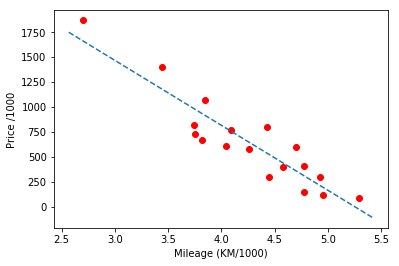

In [63]:
plt.figure()

plt.xlabel("Mileage (KM/1000)")
plt.ylabel("Price /1000")
#plt.axis([min_mileage, max_mileage, min_price, max_price])

mileage_prices = df[["km_log", "price_thousands"]]

(m,b) = fitLine(mileage_prices.iloc[:,0], mileage_prices.iloc[:,1])

plt.plot(df.km_log, df.price_thousands,"ro")

abline(m,b)

plt.show()
plt.close()

In [64]:
dset = np.array(df[["km_thousands", "price_thousands"]])
y_hat = b+m*np.log(dset[:,0])

calcRsquared(dset, y_hat)

0.84232723607235882

Thus, removing the outlier results in markedly better accuracy. Plot the log curve again...

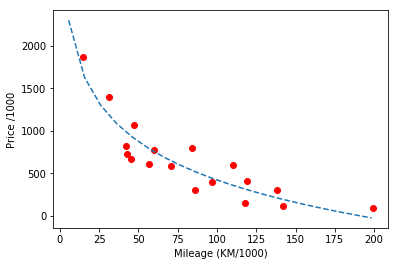

In [65]:
plt.figure()

plt.xlabel("Mileage (KM/1000)")
plt.ylabel("Price /1000")
#plt.axis([min_mileage, max_mileage, min_price, max_price])

mileage_prices = df[["km_thousands", "price_thousands"]]

plt.plot(df.km_thousands, df.price_thousands,"ro")

plotlog(m,b)

plt.show()
plt.close()